<a href="https://colab.research.google.com/github/anushkapandey123/Outliers_PES1UG20CS123_PES1UG20CS072/blob/main/EDA_Outliers_PES1UG20CS123_PES1UG20CS072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DA PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/reviews.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/listings.csv")
df_calendar = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/calendar.csv")

#**EDA**

In [ ]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Checking for any missing values in the dataset

In [ ]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [ ]:
df.isnull().sum()


id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

There are missing values in the dataset.

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Before handling missing values, we are going to drop the columns that are not useful for further analysis. For example, we have decided to drop scrape id, thumbnail_url, listing_url and other such columns.

In [ ]:
df.drop(['scrape_id'], axis = 1, inplace=True)


In [ ]:
df.drop(['listing_url', 'summary', 'space'],axis = 1, inplace=True)


In [ ]:
df.drop(['last_scraped', 'experiences_offered'], axis=1, inplace=True)

In [ ]:
df.drop(['thumbnail_url'], axis=1, inplace=True)

In [ ]:
df.drop(['neighborhood_overview', 'notes', 'transit', 'medium_url', 'picture_url'], axis=1, inplace=True)

In [ ]:
df.drop(['xl_picture_url'], axis=1, inplace=True)

In [ ]:
df.head()

,id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
# filling the float values with mean
#df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())

df.reviews_per_month.fillna(method="ffill", inplace=True)
df.tail()

,id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,46566046,https://www.airbnb.com/users/show/46566046,Glen,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",52791370,https://www.airbnb.com/users/show/52791370,Virginia,2015-12-30,US,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,25522052,https://www.airbnb.com/users/show/25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3817,10208623,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",14703116,https://www.airbnb.com/users/show/14703116,Gil,2014-04-25,"Seattle, Washington, United States",NaN,within a day,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,2.0


In [ ]:



df.at[df['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
df.at[df['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
df.at[df['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
df.at[df['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
df.at[df['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
df.at[df['review_scores_location'].isnull(), 'review_scores_location'] = 0
df.at[df['review_scores_value'].isnull(), 'review_scores_value'] = 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64
66.55316919853327
30.38239916186485
3.064431639601886


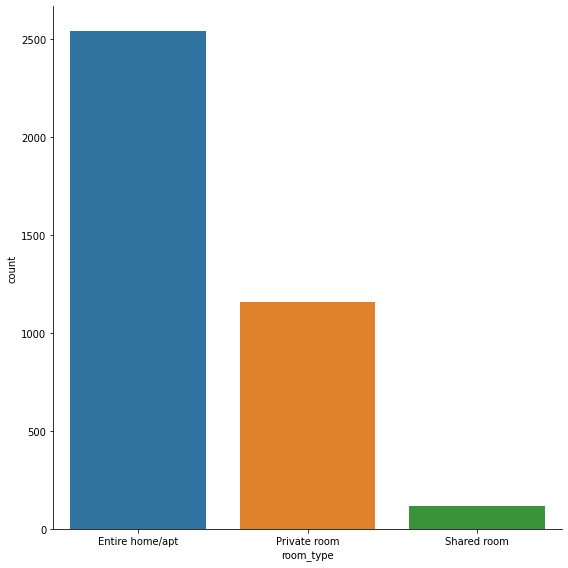

In [ ]:
sns.catplot("room_type" , data=df, kind="count", height=8)
print(df.room_type.value_counts())
for i in df.room_type.value_counts():
  print(i*100/len(df.index))


(0.0, 50.0)

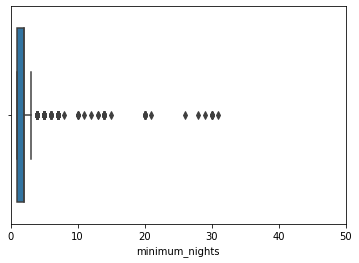

In [ ]:
sns.boxplot(x = df['minimum_nights'])
#plt.xlim(0, 1500)
plt.xlim(0, 50)

In [ ]:
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


(-10.0, 1500.0)

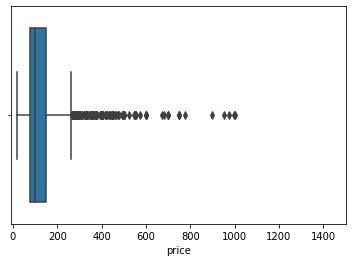

In [ ]:
sns.boxplot(x = df['price'])
plt.xlim(-10, 1500)
#plt.xlim(0, 50)

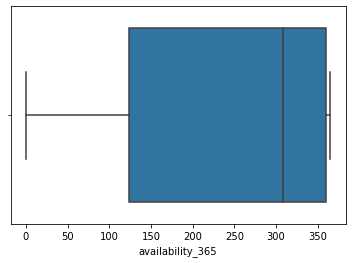

In [ ]:
sns.boxplot(x = df['availability_365'])
#plt.xlim(-10, 1500)


<BarContainer object of 10 artists>

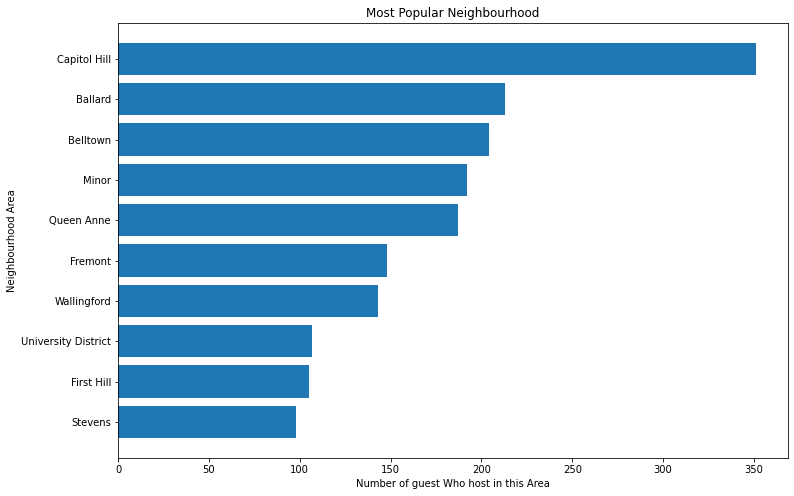

In [ ]:
data = df.neighbourhood.value_counts()[:10]
#print(data)
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
#print(x)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

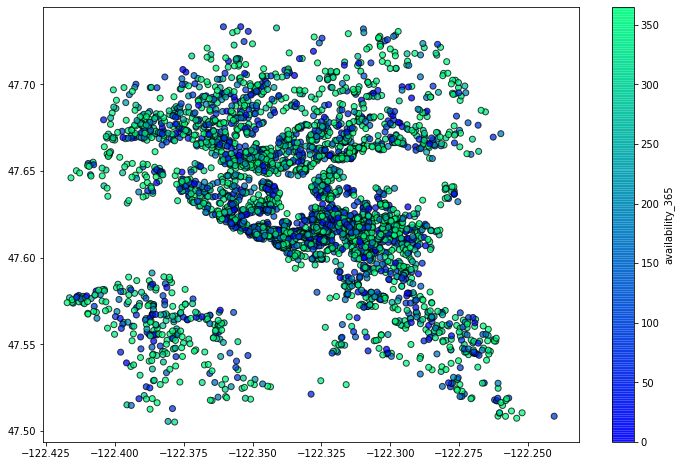

In [ ]:
#Scatter plot: Location(longitude,latitude) vs availability_365
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap="winter",edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

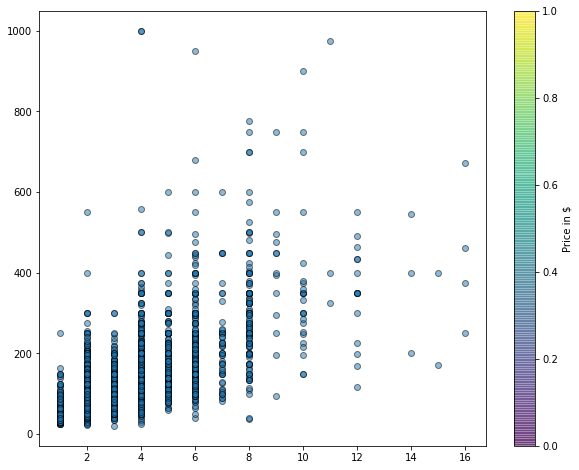

In [ ]:
#Scatter plot: Location(longitude,latitude) vs price
plt.figure(figsize=(10, 8))
plt.scatter(df.accommodates, df.price,  cmap='autumn', edgecolor='black', linewidth=1, alpha=0.5)

cbar = plt.colorbar()
cbar.set_label('Price in $')

In [ ]:
#groupby["neighbourhood"]

In [ ]:
df.rename(columns={'id':'listing_id'}, inplace=True)

In [ ]:
df_reviews['listing_id']


0        7202016
1        7202016
2        7202016
3        7202016
4        7202016
          ...   
84844    3624990
84845    3624990
84846    3624990
84847    3624990
84848    9727246
Name: listing_id, Length: 84849, dtype: int64

In [ ]:
# get estimated bookings base on reviews
df_bookings = pd.merge(df_reviews, df, on='listing_id')
df_bookings['estimated_revenue'] = df_bookings['price'] * df_bookings['minimum_nights']

# get revenue by listings
df_listings_revenue = df_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()

df_listings = pd.merge(df, df_listings_revenue, on='listing_id', how='left')

df_listings.at[df_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0
df_listings.head()

,listing_id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,estimated_revenue
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,17595.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,12900.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,78000.0
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,1.15,0.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,17100.0


In [ ]:

df_listings.at[df_listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
df_listings.at[df_listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
df_listings.at[df_listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
df_listings.at[df_listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
df_listings.at[df_listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
df_listings.at[df_listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
df_listings.at[df_listings['review_scores_value'].isnull(), 'review_scores_value'] = 0


Top most correlated columns:
review_scores_communication
review_scores_cleanliness
review_scores_value
review_scores_accuracy
review_scores_checkin
review_scores_location


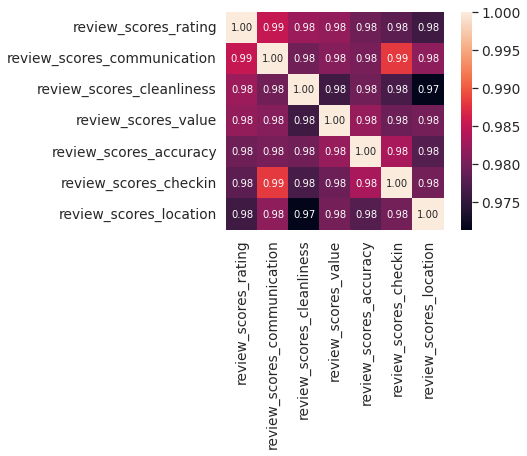

In [ ]:
pd_listings_reviews = df_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

def plot_topn_correlation_matrix_with_target(df, target_col_name, k=10):
  corrmat = df.corr()
  top_correlated_columns = corrmat.nlargest(k, target_col_name)[target_col_name].index
  cm = np.corrcoef(df[top_correlated_columns].values.T)
  sns.set(font_scale=1.25)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=top_correlated_columns.values, xticklabels=top_correlated_columns.values)
  
  return top_correlated_columns.values

top_correlated_columns = plot_topn_correlation_matrix_with_target(pd_listings_reviews, 'review_scores_rating')

print("Top most correlated columns:")
for i in top_correlated_columns:

  if(i!='review_scores_rating'):
    print(i)

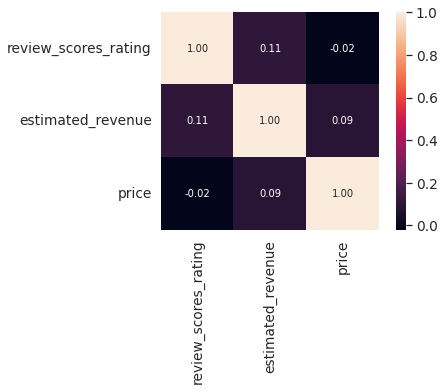

In [ ]:
_ = plot_topn_correlation_matrix_with_target(df_listings[['estimated_revenue','price','review_scores_rating']], 'review_scores_rating')


In [ ]:
df_listings.loc[df_listings['minimum_nights']<=7, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
1070,3385421,31,6,4,2.0,2.0,103602.0
2,3308979,20,4,11,5.0,7.0,78000.0
3667,53803,41,7,4,3.0,3.0,71750.0
1592,9460,240,3,2,1.0,1.0,71280.0
3165,3040278,156,2,4,2.0,2.0,67704.0


                              estimated_revenue
neighbourhood_group_cleansed                   
Downtown                            7247.666038
Capitol Hill                        7064.079365
Beacon Hill                         6606.983051
Ballard                             6078.726087
Queen Anne                          6038.752542
Central Area                        4636.371274
Other neighborhoods                 4409.843829
Cascade                             4075.134831
Seward Park                         4063.500000
Rainier Valley                      3827.345912
Delridge                            3641.189873
Magnolia                            3587.819672
West Seattle                        3370.783251
Northgate                           2962.362500
Lake City                           2476.432836
Interbay                            2105.727273
University District                 1558.557377


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


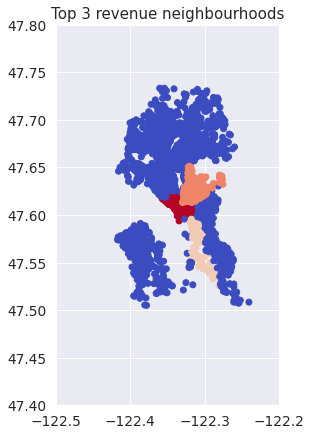

In [ ]:

pd_neighbourhood_revenue = df_listings[['neighbourhood_group_cleansed','estimated_revenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = df_listings[['neighbourhood_group_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2

# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.4, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.5, -122.2])
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot()

In [ ]:
#df_reviews['date'].dt.month
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_bookings['date'] = pd.to_datetime(df_bookings['date'])


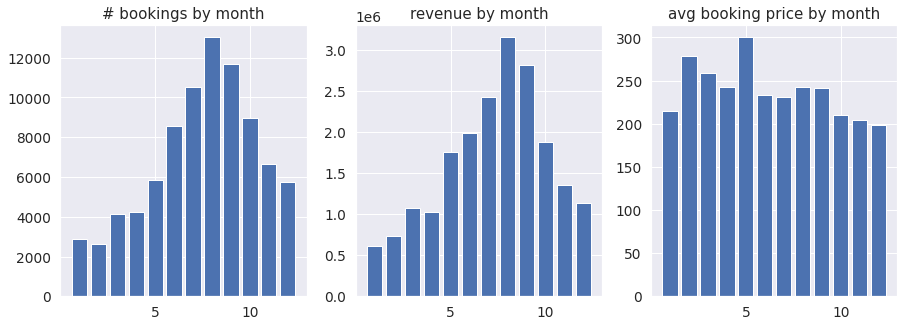

In [ ]:
plt.figure(figsize=(15, 5))

# # bookings by month

plotdata = df_reviews[['date']].groupby(df_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = df_bookings[['date','estimated_revenue']].groupby(df_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()

In [ ]:
rows_amenities = []
rows_listing_id = []

for id, row in df.loc[:, ['listing_id','amenities']].iterrows():
  rows_listing_id.append(row['listing_id'])
  
  row_amenities = {}
  amenities = row['amenities'].strip('{}')
  for amenity in amenities.split(','):
    row_amenities[amenity.strip('"')] = 1
  rows_amenities.append(row_amenities)

pd_listings_amenities = pd.DataFrame(rows_amenities, index=rows_listing_id)
pd_listings_amenities = pd_listings_amenities.fillna(0)
pd_listings_amenities.drop('', axis=1, inplace=True)
pd_listings_amenities['listing_id'] = pd_listings_amenities.index
pd_listings_amenities = pd.merge(pd_listings_amenities, df[['listing_id','number_of_reviews']], on='listing_id')

pd_rows_amenities = pd_listings_amenities.sum(axis=0)

pd_amenities_count = pd.DataFrame({'amenities':pd_rows_amenities.index, 'count':pd_rows_amenities.values})
pd_amenities_count = pd_amenities_count.sort_values('count', ascending=False)[:10]

pd_amenities_count.drop(41, axis=0, inplace=True) # drop listing_id
pd_amenities_count.drop(42, axis=0, inplace=True) # drop number_of_reviews
pd_amenities_count

,amenities,count
3,Wireless Internet,3667.0
6,Heating,3627.0
5,Kitchen,3423.0
12,Smoke Detector,3281.0
17,Essentials,3237.0
9,Dryer,2997.0
8,Washer,2992.0
2,Internet,2811.0


Finding important features to predict price using Xtra Tree Regressor
(Suggestion received during peer review)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
newdf.isna().sum()

listing_id                           0
host_id                              0
host_listings_count                  2
host_total_listings_count            2
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
square_feet                       3721
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location   

In [ ]:
newdf.square_feet.fillna(value=df['square_feet'].mean(), inplace=True)
newdf.host_listings_count.fillna(method="bfill", inplace=True)
newdf.host_total_listings_count.fillna(method="bfill", inplace=True)
newdf.bathrooms.fillna(method="bfill", inplace=True)
newdf.beds.fillna(method="bfill", inplace=True)
newdf.bedrooms.fillna(method="bfill", inplace=True)
newdf.drop(['license','listing_id','host_id'],axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


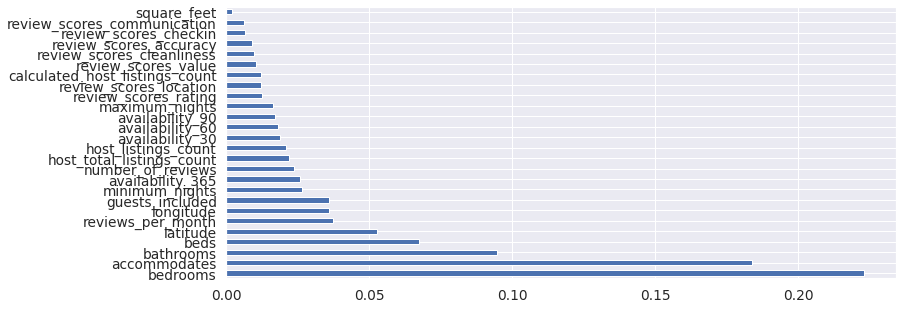

In [ ]:
features = newdf.drop(['price'],axis = 1)
label = newdf["price"]
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(features, label)
imp_features = pd.Series(ext.feature_importances_, index = features.columns)

plt.figure(figsize=(12,5))
imp_features.nlargest(30).plot(kind = 'barh')
plt.show()

#**Model Building**

###**Recommendation System**

We are building a recommendation system that can prove useful to both hosts and tourists. 
*   For a new host, the recommendation system can recommends k places similar to the one entered(which the host can enter as the most popular one in their neighbourhood) and the host can thereby figure out what the makes these places popular based on the description(which is also emitted by the recommendation system)
*   Tourists can look for places similar to the ones they like.

In [ ]:
#Importing the required libbraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df['name'] = df['name'].astype('str')
df['description'] = df['description'].astype('str')
name_corpus = ' '.join(df['name'])
description_corpus = ' '.join(df['description'])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)

In [ ]:
name_wordcloud

In [ ]:
df['content'] = df[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
print(df['content'])

0       Stylish Queen Anne Apartment // Make your self...
1       Bright & Airy Queen Anne Apartment // Chemical...
2       New Modern House-Amazing water view // New mod...
3       Queen Anne Chateau // A charming apartment tha...
4       Charming craftsman 3 bdm house // Cozy family ...
                              ...                        
3813    3BR Mountain View House in Seattle // Our 3BR/...
3814    Portage Bay View!-One Bedroom Apt // 800 squar...
3815    Private apartment view of Lake WA // Very comf...
3816    Amazing View with Modern Comfort! // Cozy stud...
3817    Large Lakefront Apartment // All hardwood floo...
Name: content, Length: 3818, dtype: object


In [ ]:
df['content'].isna().sum()

0

In [ ]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df['content'])

In [ ]:
cos_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
results = {}
for idx, row in df.iterrows():
    similar_indices = cos_similarities[idx].argsort()[:-50:-1]
    similar_items = [(cos_similarities[idx][i], df['listing_id'][i]) for i in similar_indices]
    results[row['listing_id']] = similar_items[1:]

In [ ]:
def item(id):
    name   = df.loc[df['listing_id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + df.loc[df['listing_id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    street_name = ' \nLocation: ' + df.loc[df['listing_id'] == id]['street'].tolist()[0]
    prediction = name  + street_name + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')


In [ ]:
#Showing the output for a listing with listing is=d  278830
recommend(item_id = 278830, num = 5)

Recommending 5 products similar to Charming craftsman 3 bdm house 
Location: 14th Ave W, Seattle, WA 98119, United States 
Description: Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedrooms, can accomodate up to 6 people. 1,200 sq. feet space is your oasis...
---

Recommended: Charming modern 2 bdm getaway  
Location: 14th Avenue West, Seattle, WA 98119, United States 
Description: New modern mother in law unit built 2014 in a charming craftsman home. Private entrance off the main house. 7 minutes to downtown, 5 minute walk to Whole Foods Inter...
(score:0.1299121611860397)

Recommended: Classic Queen Anne Condo 
Location: Ward Street, Seattle, WA 98109, United States 
Description: Come and enjoy the beautiful sights and sounds of Seattle oldest neighborhood, Queen Anne. Walking distance to Key arena, Seattle Center, Space Needle, EMP and close...
(score:0.08498215173232422)

Recommended: QUEEN ANNE VIEW ONE! - SEATTLE 
Location: 12th Avenue

###MLR

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   description                       3818 non-null   object 
 3   host_id                           3818 non-null   int64  
 4   host_url                          3818 non-null   object 
 5   host_name                         3816 non-null   object 
 6   host_since                        3816 non-null   object 
 7   host_location                     3810 non-null   object 
 8   host_about                        2959 non-null   object 
 9   host_response_time                3295 non-null   object 
 10  host_response_rate                3295 non-null   object 
 11  host_acceptance_rate              3045 non-null   object 
 12  host_i

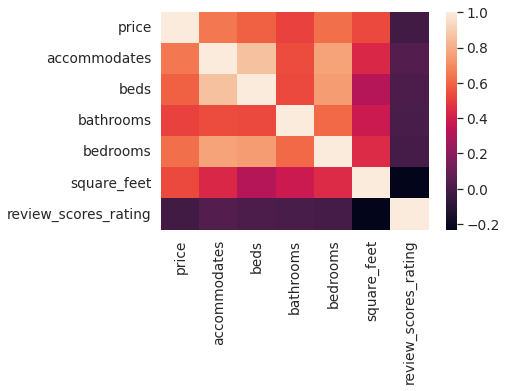

In [ ]:
listings_selected = df[[
    'price',
    'accommodates', 
    'beds','bathrooms',
    'bedrooms','square_feet',
    'review_scores_rating'
  
]]
fig = plt.figure()
sns.heatmap(listings_selected.corr())

In [ ]:
listings_selected.isna().sum()

price                      0
accommodates               0
beds                       1
bathrooms                 16
bedrooms                   6
square_feet             3721
review_scores_rating       0
dtype: int64

In [ ]:
listings_selected.square_feet.fillna(value=df['square_feet'].mean(), inplace=True)
listings_selected.bathrooms.fillna(method="bfill", inplace=True)
listings_selected.bedrooms.fillna(method="bfill", inplace=True)
listings_selected.beds.fillna(method="bfill", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
listings_selected.isna().sum()

price                   0
accommodates            0
beds                    0
bathrooms               0
bedrooms                0
square_feet             0
review_scores_rating    0
dtype: int64

In [ ]:
import numpy as np
X = listings_selected[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','square_feet'
]]
y = listings_selected['price']

X = np.asarray(X)
y = np.asarray(y)

#X= X.reshape(-1, 1)
#y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 100)

lm = LinearRegression()


lm.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print(lm.score(X_train, y_train))
y_pred = lm.predict(X_test)


0.48172040460296217


In [ ]:
print("R^2 value using score fn: %.3f" % lm.score(X_test,y_test))
print("Mean Squared Error : %0.3f" % mean_squared_error(y_test,y_pred))

R^2 value using score fn: 0.482
Mean Squared Error : 3640.089


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


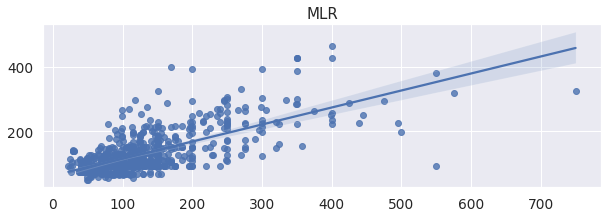

In [ ]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred)
plt.title("MLR")
plt.show()

### Time Series

In [ ]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:

#df_calendar = pd.read_csv("/content/drive/MyDrive/SEATTLE_AIRBNB/calendar.csv")

df_calendar['date'] = pd.to_datetime(df_calendar['date'],format="%Y-%m-%d")
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['day'] = df_calendar['date'].dt.day
df_calendar['day_name'] = df_calendar['date'].dt.day_name()
df_calendar['day_num'] = df_calendar['date'].dt.weekday

#Covert available to numeric data
df_calendar['available'] = df_calendar['available'].apply(lambda x:1 if x =='t' else 0)

df_calendar.head()



,listing_id,date,available,price,year,month,day,day_name,day_num
0,241032,2016-01-04,0,$85.00,2016,1,4,Monday,0
1,241032,2016-01-05,0,$85.00,2016,1,5,Tuesday,1
2,241032,2016-01-06,0,NaN,2016,1,6,Wednesday,2
3,241032,2016-01-07,0,NaN,2016,1,7,Thursday,3
4,241032,2016-01-08,0,NaN,2016,1,8,Friday,4


TypeError: ignored

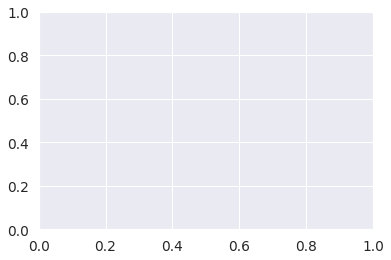

In [ ]:
fig,ax = plt.subplots()
ax.plot(df_calendar[df_calendar.year==2016].groupby(['month']).price().mean(),color='blue', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_calendar[df_calendar.year==2016].groupby(['month']).available.sum(), color='orange', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('# of Available Listings')

ax2.legend(loc=2)
ax2.legend(loc=4)

plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

In [ ]:
X = df[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','latitude'
]]
y = df['price']
y = np.asarray(y)
y = y.reshape(-1, 1)
df.bathrooms.fillna(method="bfill", inplace=True)
df.bedrooms.fillna(method="bfill", inplace=True)
df.beds.fillna(method="bfill", inplace=True)
df.accommodates.fillna(method="bfill", inplace=True)
df.latitude.fillna(method="bfill", inplace=True)

### Random Forest Regressor

In [ ]:
X = df[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','latitude'
]]
y = df['price']
y = np.asarray(y)
y = y.reshape(-1, 1)

df.bathrooms.fillna(method="bfill", inplace=True)
df.bedrooms.fillna(method="bfill", inplace=True)
df.beds.fillna(method="bfill", inplace=True)
df.accommodates.fillna(method="bfill", inplace=True)
df.latitude.fillna(method="bfill", inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 100)

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

regressor.fit(X_train, y_train)  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
print("Mean Squared Error : %0.3f" % mean_squared_error(y_test,y_pred))


Mean Squared Error : 3461.870


### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
X = df[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','latitude'
]]
y = df['price']
y = np.asarray(y)
y = y.reshape(-1, 1)

df.bathrooms.fillna(method="bfill", inplace=True)
df.bedrooms.fillna(method="bfill", inplace=True)
df.beds.fillna(method="bfill", inplace=True)
df.accommodates.fillna(method="bfill", inplace=True)
df.latitude.fillna(method="bfill", inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 20)


In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


[03:07:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 73.050683


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


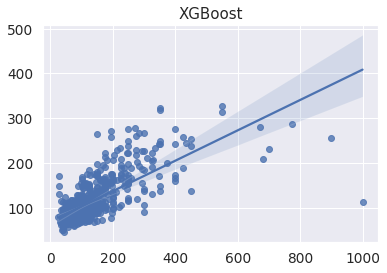

In [ ]:
#fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,preds)
plt.title("XGBoost")
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline 

from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, RobustScaler

In [ ]:
X = df[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','latitude'
]]
y = df['price']
y = np.asarray(y)
y = y.reshape(-1, 1)

df.bathrooms.fillna(method="bfill", inplace=True)
df.bedrooms.fillna(method="bfill", inplace=True)
df.beds.fillna(method="bfill", inplace=True)
df.accommodates.fillna(method="bfill", inplace=True)
df.latitude.fillna(method="bfill", inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
my_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC(C=4.0,kernel = 'rbf',degree = 3,coef0 = 2.0))
        ])
       

    
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	        Normalizer(), MaxAbsScaler()]
	    }
       
my_pipe.fit(X_train,y_train)
      
score = my_pipe.score(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = my_pipe.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 71.696952


### RANSAC Regressor

In [ ]:
X = df[[ 
    'bathrooms',
    'bedrooms',
    'accommodates',
    'beds','latitude'
]]
y = df['price']
y = np.asarray(y)
y = y.reshape(-1, 1)

df.bathrooms.fillna(method="bfill", inplace=True)
df.bedrooms.fillna(method="bfill", inplace=True)
df.beds.fillna(method="bfill", inplace=True)
df.accommodates.fillna(method="bfill", inplace=True)
df.latitude.fillna(method="bfill", inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
		max_trials=4, 		# Number of Iterations
		min_samples=2, 		# Minimum size of the sample
		loss='absolute_loss', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		)


ransac.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                max_trials=4, min_samples=2, residual_threshold=10)

In [ ]:
y_pred = ransac.predict(X_test)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 78.335399


### Review Score Rating

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
newdf.isna().sum()

listing_id                           0
host_id                              0
host_listings_count                  2
host_total_listings_count            2
latitude                             0
longitude                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
square_feet                       3721
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location   

In [ ]:

newdf.square_feet.fillna(value=df['square_feet'].mean(), inplace=True)
newdf.host_listings_count.fillna(method="bfill", inplace=True)
newdf.host_total_listings_count.fillna(method="bfill", inplace=True)
newdf.bathrooms.fillna(method="bfill", inplace=True)
newdf.beds.fillna(method="bfill", inplace=True)
newdf.bedrooms.fillna(method="bfill", inplace=True)
newdf.drop(['license','listing_id','host_id'],axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


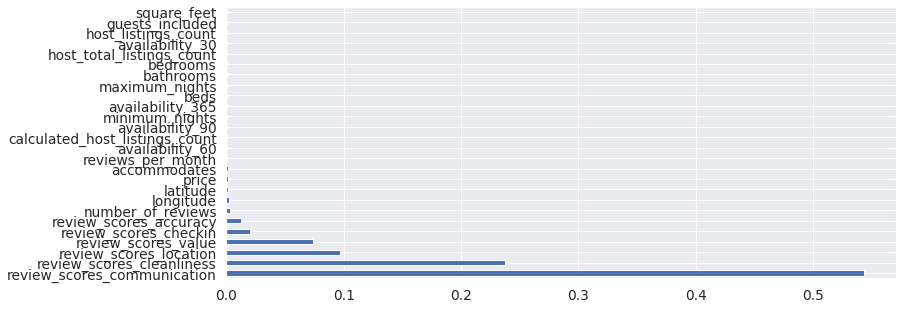

In [ ]:

features = newdf.drop(['review_scores_rating'],axis = 1)
label = newdf["review_scores_rating"]
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(features, label)
imp_features = pd.Series(ext.feature_importances_, index = features.columns)

plt.figure(figsize=(12,5))
imp_features.nlargest(30).plot(kind = 'barh')
plt.show()

In [ ]:
df.isna().sum()

listing_id                          0
name                                0
description                         0
host_id                             0
host_url                            0
                                   ..
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
content                             0
Length: 80, dtype: int64